In [13]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from xgboost import XGBRegressor


In [14]:

# Load your data
df = pd.read_csv("../data/data.csv")
df


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [15]:
# Basic statistics
print(df["Session_Duration (hours)"].describe())

count    973.000000
mean       1.256423
std        0.343033
min        0.500000
25%        1.040000
50%        1.260000
75%        1.460000
max        2.000000
Name: Session_Duration (hours), dtype: float64


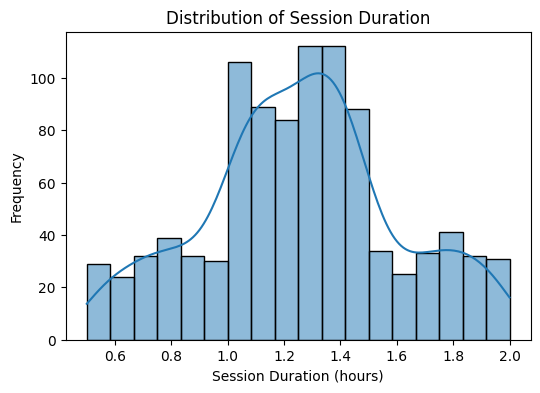

In [16]:
import matplotlib.pyplot as plt
# Distribution plot
plt.figure(figsize=(6, 4))
sns.histplot(df["Session_Duration (hours)"], kde=True)
plt.title("Distribution of Session Duration")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Frequency")
plt.show()

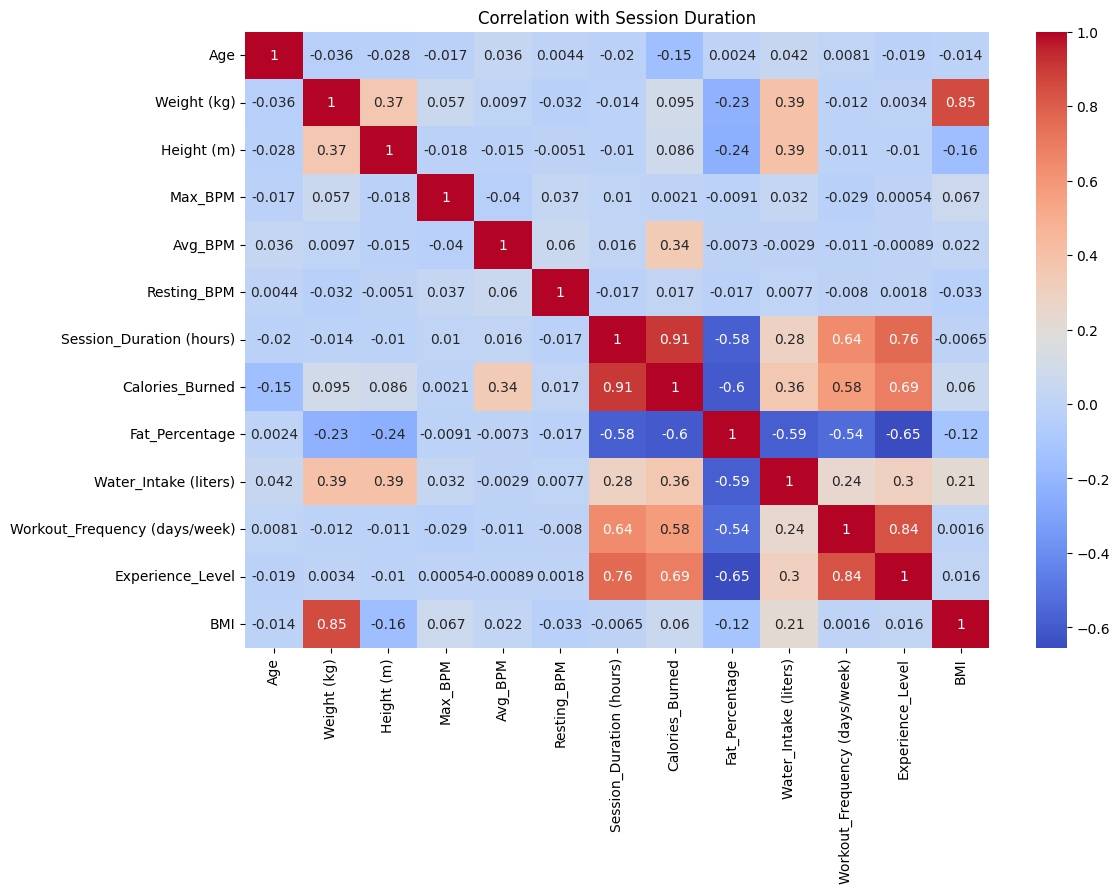

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation with Session Duration")
plt.show()

In [18]:
# Save original Experience_Level column before encoding
df['Experience_Level_original'] = df['Experience_Level']

print(df['Experience_Level_original'].value_counts())
# Then apply get_dummies encoding
df = pd.get_dummies(df, columns=['Gender', 'Workout_Type', 'Experience_Level'], drop_first=True)


Experience_Level_original
2    406
1    376
3    191
Name: count, dtype: int64


In [19]:
df

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Experience_Level_original,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Experience_Level_2,Experience_Level_3
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,30.20,3,True,False,False,True,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,32.00,2,False,True,False,False,True,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,24.71,2,False,False,False,False,True,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,18.41,1,True,False,True,False,False,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,14.39,1,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,28.77,3,True,False,True,False,False,True
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,25.69,1,True,False,True,False,False,False
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,19.50,3,False,False,False,False,False,True
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,37.74,2,True,True,False,False,True,False


In [20]:
df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI',
       'Experience_Level_original', 'Gender_Male', 'Workout_Type_HIIT',
       'Workout_Type_Strength', 'Workout_Type_Yoga', 'Experience_Level_2',
       'Experience_Level_3'],
      dtype='object')

In [21]:


# Selected features from RFE
selected_features = ['Age', 'Avg_BPM','Calories_Burned',  'Fat_Percentage', 'Gender_Male' , 'Experience_Level_original']

# Split your data with selected features
X_selected = df[selected_features]
y = df['Session_Duration (hours)']
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the model with your best parameters or defaults
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0.1,
    random_state=42
)

# Cross-validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print(f"Cross-Validation R² scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Train the model on full training data
model.fit(X_train, y_train)

# Predict
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Metrics
print(f"Train R²: {r2_score(y_train, train_preds):.4f}")
print(f"Test R²:  {r2_score(y_test, test_preds):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, train_preds):.4f}")
print(f"Test MSE:  {mean_squared_error(y_test, test_preds):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, train_preds):.4f}")
print(f"Test MAE:  {mean_absolute_error(y_test, test_preds):.4f}")



Cross-Validation R² scores: [0.96515919 0.95897467 0.94619149 0.94682562 0.94548284]
Mean CV R²: 0.9525 ± 0.0080
Train R²: 0.9713
Test R²:  0.9566
Train MSE: 0.0033
Test MSE:  0.0058
Train MAE: 0.0440
Test MAE:  0.0606


Train RMSE: 0.0570
Test RMSE: 0.0763


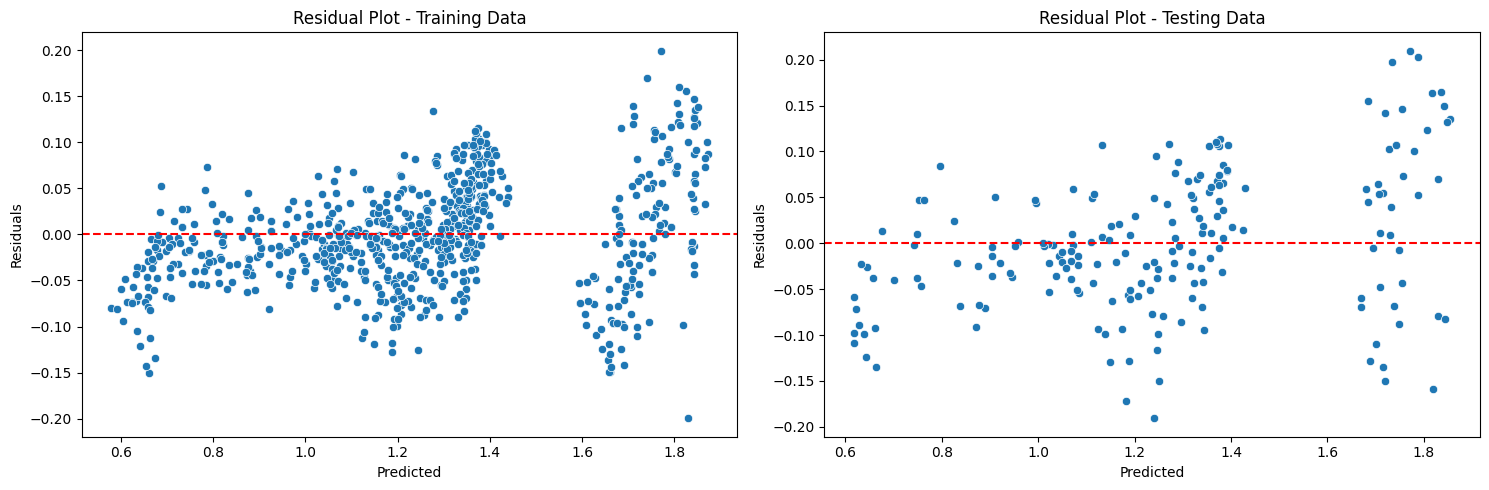

In [22]:
# Calculate residuals
residuals_train = y_train - train_preds
residuals_test = y_test - test_preds

# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

# Plot residuals for train and test side by side
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Training residuals
sns.scatterplot(x=train_preds, y=residuals_train, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Residual Plot - Training Data")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Residuals")

# Testing residuals
sns.scatterplot(x=test_preds, y=residuals_test, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title("Residual Plot - Testing Data")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residuals")

plt.tight_layout()
plt.show()


In [23]:


# Save the trained model to a file
joblib.dump(model, '../models/session-duration/duration.pkl')



['../models/session-duration/duration.pkl']

In [24]:


# Load the saved model
model = joblib.load('../models/session-duration/duration.pkl')

# Define 5 diverse test samples
test_samples = pd.DataFrame([
    {
        'Age': 22,
        'Avg_BPM': 160,
        'Calories_Burned': 700,
        'Fat_Percentage': 15,
        'Gender_Male': 1,
        'Experience_Level_original': 1
    },
    {
        'Age': 30,
        'Avg_BPM': 140,
        'Calories_Burned': 850,
        'Fat_Percentage': 20,
        'Gender_Male': 0,
        'Experience_Level_original': 2
    },
    {
        'Age': 28,
        'Avg_BPM': 175,
        'Calories_Burned': 950,
        'Fat_Percentage': 18,
        'Gender_Male': 1,
        'Experience_Level_original': 3
    },
    {
        'Age': 35,
        'Avg_BPM': 155,
        'Calories_Burned': 780,
        'Fat_Percentage': 22,
        'Gender_Male': 0,
        'Experience_Level_original': 2
    },
    {
        'Age': 26,
        'Avg_BPM': 165,
        'Calories_Burned': 890,
        'Fat_Percentage': 17,
        'Gender_Male': 1,
        'Experience_Level_original': 1
    }
])

# Ensure columns are in the correct order
columns_order = ['Age', 'Avg_BPM', 'Calories_Burned', 'Fat_Percentage', 'Gender_Male', 'Experience_Level_original']
test_samples = test_samples[columns_order]

# Predict for all samples
predictions = model.predict(test_samples)

# Print results
for i, duration in enumerate(predictions, 1):
    print(f"Sample {i} - Predicted Duration: {duration:.2f} hours")



Sample 1 - Predicted Duration: 0.82 hours
Sample 2 - Predicted Duration: 1.23 hours
Sample 3 - Predicted Duration: 1.44 hours
Sample 4 - Predicted Duration: 1.01 hours
Sample 5 - Predicted Duration: 1.13 hours
